# Data Wrangling
1. Data Collection 
2. Data Definition
3. Data Cleaning

## 2. Data Definition

Data contained in this dataset comes from free-form and not mandatory surveys, therefore the responses were inconsistent, resulting in poor data integrity and sparse values across the table. However, the amount of data collected is enough to perform meaningful analysis and variable prediction.

It makes sense to perform some basic cleaning before looking into data definition. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# Importing consolidated data

file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/consolidated.csv'

df = pd.read_csv(file, index_col=0, low_memory=False)

In [3]:
# Reviewing summary statistics of the variables

pd.set_option('display.max_rows', None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INST_FURNACE,75110.0,2.337372e-01,4.265626e-01,0.00,0.00,0.00,0.00,4.00
INST_FURNACE_AFUE,3478.0,8.938097e+01,7.593994e+00,45.00,80.00,95.00,96.00,100.00
INST_BOILER,75110.0,1.934496e-02,1.381213e-01,0.00,0.00,0.00,0.00,2.00
INST_BOILER_AFUE,963.0,9.083593e+01,4.935559e+00,71.00,86.00,93.00,95.00,98.00
INST_WOOD_STOVE,75110.0,4.260418e-04,2.063652e-02,0.00,0.00,0.00,0.00,1.00
INST_WATER_HEATER,75110.0,1.573692e-01,3.688011e-01,0.00,0.00,0.00,0.00,15.00
INST_WATER_HEATER_EF,976.0,9.424488e-01,3.904412e-01,0.30,0.80,0.90,0.93,2.60
INST_HEAT_PUMP,75110.0,5.896685e-02,2.435124e-01,0.00,0.00,0.00,0.00,9.00
INST_HEAT_PUMP_COP,3824.0,1.250262e-01,1.803308e+00,0.00,0.00,0.00,0.00,100.00
INST_HEAT_PUMP_EER,227.0,1.664405e+01,7.480482e+00,1.00,12.50,14.40,22.00,31.00


In [4]:
# Reviewing missing values and data types of the variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75110 entries, 0 to 75109
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INST_FURNACE                 75110 non-null  int64  
 1   INST_FURNACE_AFUE            3478 non-null   float64
 2   INST_FURNACE_FUEL            3629 non-null   object 
 3   INST_BOILER                  75110 non-null  int64  
 4   INST_BOILER_AFUE             963 non-null    float64
 5   INST_BOILER_FUEL             1062 non-null   object 
 6   INST_WOOD_STOVE              75110 non-null  int64  
 7   INST_WATER_HEATER            75110 non-null  int64  
 8   INST_WATER_HEATER_FUEL       1835 non-null   object 
 9   INST_WATER_HEATER_EF         976 non-null    float64
 10  INST_HEAT_PUMP               75110 non-null  int64  
 11  INST_HEAT_PUMP_TYPE          1250 non-null   object 
 12  INST_HEAT_PUMP_COP           3824 non-null   float64
 13  INST_HEAT_PUMP_E

In [5]:
# Reviewing number of unique values of the variables

df.nunique(axis=0, dropna=True)

INST_FURNACE                      4
INST_FURNACE_AFUE                22
INST_FURNACE_FUEL                 7
INST_BOILER                       3
INST_BOILER_AFUE                 20
INST_BOILER_FUEL                  7
INST_WOOD_STOVE                   2
INST_WATER_HEATER                 5
INST_WATER_HEATER_FUEL            6
INST_WATER_HEATER_EF             55
INST_HEAT_PUMP                    6
INST_HEAT_PUMP_TYPE               2
INST_HEAT_PUMP_COP               14
INST_HEAT_PUMP_EER               59
INST_HEAT_PUMP_HSPF              53
INST_HEAT_PUMP_SEER              54
INST_AC                           5
INST_AC_SEER                     51
INST_AC_EER                      29
INST_VENT_SYS                     4
INST_VENT_SYS_CAT                 3
INST_VENT_SYS_TYPE                3
INST_INSUL_ATTIC                  2
INST_INSUL_ATTIC_R               81
INST_INSUL_ATTIC_THICK           61
INST_DUCT_INSUL                   2
INST_DUCT_INSUL_R                27
INST_INSUL_WALL             

## 3. Data Cleaning

**Cleaning some obvious inconsistent values:**

In [6]:
# Changing negative values to possitive for selected columns. Negative values seem like an input error.

df['INSTALL_ELECT_SAVINGS_KWH'] = abs(df['INSTALL_ELECT_SAVINGS_KWH'])
df['INSTALL_NG_SAVINGS_THERMS'] = abs(df['INSTALL_NG_SAVINGS_THERMS'])
df['INSTALL_FO_SAVINGS_GAL'] = abs(df['INSTALL_FO_SAVINGS_GAL'])
df['INSTALL_LPG_SAVINGS_GAL'] = abs(df['INSTALL_LPG_SAVINGS_GAL'])

In [7]:
# Dealing with more inconsistent values

df['OCCUPANCY'].value_counts()

 0.0           19818
 2.0           12695
 3.0            5772
 4.0            5430
 1.0            5134
-88888888.0     2906
 5.0            1773
 6.0             527
 7.0             166
 8.0              81
 10.0             40
 9.0              31
Name: OCCUPANCY, dtype: int64

In [8]:
# Filling na with median value of the series

df['OCCUPANCY'] = df['OCCUPANCY'].replace(-88888888.00, np.nan)

---
**Checking the unique values contained in the building's feature variables.**


In [9]:
df['FLOORAREA'].value_counts()

Unknown    11790
500         2949
2000        1915
1800        1899
1550        1896
1500        1825
1400        1785
1200        1763
1300        1710
1600        1659
1700        1579
1900        1453
1750        1434
1450        1418
1000        1351
1650        1351
1250        1335
2200        1328
2100        1301
1350        1296
1850        1247
1100        1244
2400        1222
1150        1172
1950        1121
2300        1110
1050        1070
2500        1070
2050        1052
2250        1046
2150        1041
950          871
2600         860
900          838
2350         829
3000         808
2450         778
2700         748
2800         730
2550         662
800          601
2650         593
2900         579
850          568
2750         556
2950         459
2850         433
3200         433
3050         426
3100         411
3150         393
6000         369
3500         364
3300         333
700          328
750          327
3400         320
3250         312
3350         2

In [10]:
# Replacing Unknown for Nan values
df['FLOORAREA'] = df['FLOORAREA'].replace('Unknown', np.nan, regex=True)

In [11]:
# Checking for inconsistent data

df['DECADEBUILT'].value_counts()

Unknown    16053
1950        9877
1960        6559
1970        6414
1980        5577
1920        5353
1990        4676
1940        4073
1700        2977
2000        2586
1930        2563
1900        2561
1910        2418
1890        1075
1880         507
1850         351
1870         321
1860         296
2010         193
1840         155
1800         141
1830         121
1820         104
1810          60
1750          43
1790          30
1780          14
1730           4
1770           3
1760           3
1740           2
Name: DECADEBUILT, dtype: int64

In [12]:
# Replacing Unknown for Nan values
df['DECADEBUILT'] = df['DECADEBUILT'].replace('Unknown', np.nan, regex=True)

In [13]:
df['INSTALL_FO_SAVINGS_GAL'].value_counts()

0        65034
70        4065
214         74
607         63
64          52
150         39
862         39
57          38
143         36
86          35
93          34
100         32
243         32
114         32
90          31
79          30
300         30
120         30
207         29
75          29
250         28
157         28
107         28
38          27
98          27
129         26
179         26
186         26
164         24
171         24
440         23
80          23
68          23
229         23
400         23
236         22
329         22
65          22
490         22
105         22
290         22
350         21
450         21
71          21
43          20
200         20
36          20
264         20
307         20
220         20
160         20
480         20
193         19
121         18
429         18
357         18
74          18
714         18
420         18
230         18
436         18
221         18
101         17
460         17
314         17
590         17
510       

In [14]:
df['INSTALL_LPG_SAVINGS_GAL'].value_counts()

0       74491
1348       23
35         18
131        10
88          8
142         7
215         7
109         7
197         7
99          6
164         6
179         5
55          5
361         5
30          5
208         5
547         4
77          4
219         4
274         4
75          4
73          4
74          4
482         4
16          3
199         3
350         3
22          3
103         3
159         3
69          3
153         3
92          3
180         3
7           3
296         3
83          3
178         3
263         3
175         3
134         3
383         3
2           3
32          3
34          3
143         3
132         3
148         3
214         3
127         3
3           3
186         3
200         3
222         3
198         3
339         3
602         3
1385        2
169         2
210         2
43          2
300         2
657         2
427         2
106         2
44          2
12          2
105         2
37          2
400         2
591         2
416   

In [15]:
df['INSTALL_KERO_SAVINGS_GAL'].value_counts()

0      75073
200        2
52         2
178        2
24         1
794        1
154        1
26         1
281        1
89         1
271        1
215        1
415        1
139        1
266        1
129        1
320        1
347        1
61         1
98         1
123        1
36         1
41         1
169        1
361        1
170        1
44         1
300        1
109        1
430        1
175        1
375        1
185        1
250        1
162        1
Name: INSTALL_KERO_SAVINGS_GAL, dtype: int64

In [16]:
df['INSTALL_WOOD_SAVINGS_MMBTU'].value_counts()

0       75040
20          8
1           3
2           3
40          3
10          3
60          2
61          2
4           2
24          2
12          2
64          2
28          2
31          2
139         1
2000        1
77          1
13          1
9           1
73          1
17          1
7           1
69          1
5           1
3           1
65          1
72          1
63          1
18          1
149         1
57          1
54          1
51          1
50          1
49          1
45          1
106         1
41          1
37          1
36          1
35          1
34          1
32          1
30          1
27          1
23          1
22          1
277         1
Name: INSTALL_WOOD_SAVINGS_MMBTU, dtype: int64

In [17]:
df['AUDITSOFTWARENAME'].value_counts()

None                                 23696
TREAT                                14644
PSD Surveyor                          6341
EPS                                   3145
HOMECHECK                             2896
Deemed Savings                        2534
Real Home Analyzer                    2477
REM/Rate                              2081
RHA                                   2055
Energy Savvy                          1795
Energy Measure Home                   1778
OptiMiser                             1440
Custom Retrofit Calculator            1250
CT Field Savings Tool                 1197
BEACON                                1080
SIMPLE                                 991
Other                                  808
Clipboard                              729
Home Energy Saver Pro                  483
HERO                                   475
REM/Design                             465
Prescribed Measures                    409
Mackelsoft                             321
Recurve    

In [18]:
df['PREDICTIONMETHODTYPEDESC'].value_counts()

None                                            39244
Deemed Savings                                  16759
PSD Surveyor                                     4911
Energy Measure Home                              2419
REM/Rate                                         1860
EPS                                              1578
Real Home Analyzer                               1172
SIMPLE                                           1067
Home Energy Saver Pro                             958
BEACON                                            938
Savings Estimator Template                        809
OptiMiser                                         785
HERO                                              495
Pre-packaged Measures                             357
TREAT                                             346
EnergyPro                                         269
Other                                             223
NEAT                                              140
Energy Gauge                

For the purpose of this project it is not relevant which type of software has been used to perform the energy audit (two cells above), but it is important to know if there was a previous estimate to support the retrofit measures decisions.

I will create a new variable to indicate whether the house has been audited or not.

In [19]:
df['IS_AUDITED'] = df['AUDITSOFTWARENAME'] != 'None'
df['IS_AUDITED'] = df['IS_AUDITED'].astype('float')
df.drop(['AUDITSOFTWARENAME', 'PREDICTIONMETHODTYPEDESC'], axis=1, inplace=True)

In [20]:
df['STATE'].value_counts()

NY    16939
ME     9137
MI     7442
CA     3959
TX     3531
IL     3490
CO     3308
WA     3279
OR     2953
PA     2774
MO     2747
WI     1735
VA     1602
NE     1360
AL     1251
CT     1216
MD     1188
IN     1165
OH      883
NH      805
VT      620
NC      555
KY      515
TN      508
MA      413
FL      369
GA      368
NV      341
AZ      268
NJ      158
SC      125
LA      102
DC        1
DE        1
WV        1
AR        1
Name: STATE, dtype: int64

The location of the projects is not very relevant, however it can be translated into climate zones which may have a high impact on retrofit returns.

In [21]:
# Reaggruping State categories into new climate zones categories.

climate_zones ={'FL': 1, 'LA': 1, 'SC': 2, 'GA': 2, 'AL': 2, 'MS': 2, 'AR': 2, 'OK': 2, 'TX': 2, 'CA': 2, 'NC': 3, 'TN': 3,
                'VA': 3, 'WV': 3, 'KY': 3, 'MO': 3, 'KS': 3, 'NM': 3, 'NJ': 3, 'DE': 3, 'MD': 3, 'DC': 3, 'MA': 4, 'RI': 4, 
                'CT': 4, 'PA': 4, 'OH': 4, 'IN': 4, 'IL': 4, 'IA': 4, 'NE': 4, 'CO': 4, 'UT': 4, 'AZ': 4, 'NV': 4, 'OR': 4, 
                'WA': 4, 'ME': 5, 'NH': 5, 'VT': 5, 'NY': 5, 'MI': 5, 'WI': 5, 'MN': 5, 'SD': 5, 'ND': 5, 'MT': 5, 'WY': 5, 
                'ID': 5
                }


df['CLIMATE_ZONE'] = df['STATE'].replace(climate_zones)
df.drop(['STATE'], axis=1, inplace=True)

In [22]:
df['CLIMATE_ZONE'].value_counts()

5    36678
4    21450
2     9235
3     7276
1      471
Name: CLIMATE_ZONE, dtype: int64

---
---
**In this section below I will deal with missing values. To do so I will treat separately variables about building features and installed retrofit measures.**

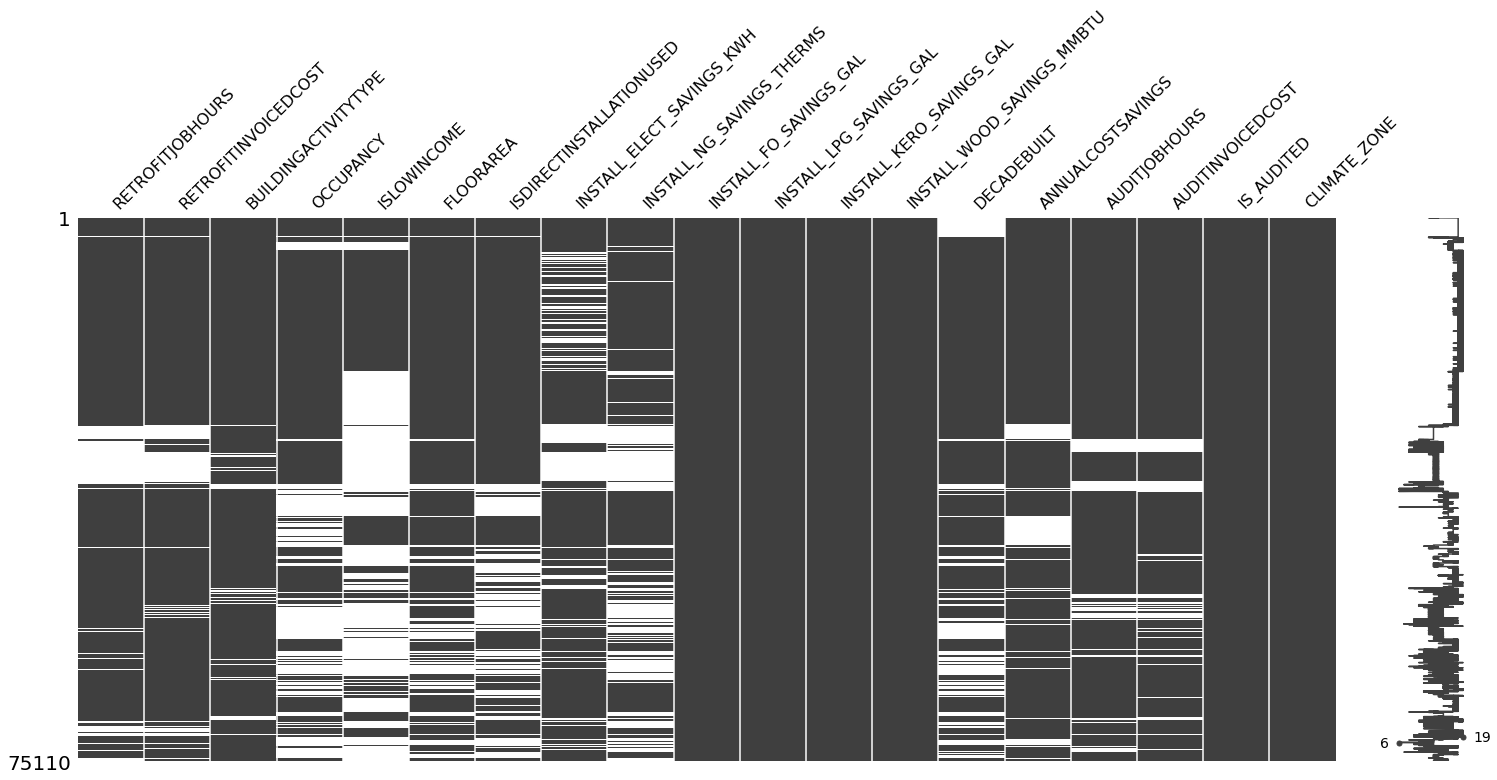

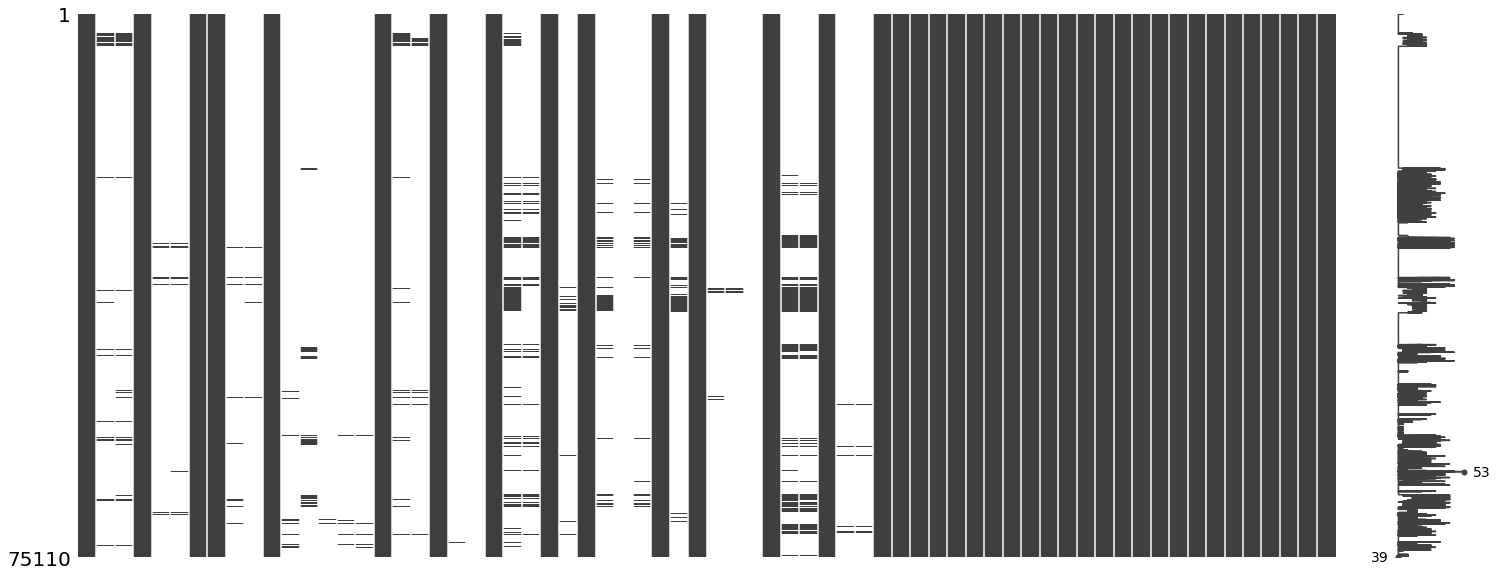

In [23]:
# Visualizing missingness for building features and installed measures

# Selecting building features by excluding columns starting with 'INST_'
build_features = [i for i in df.columns if not i.startswith('INST_')]
build_features_df = df[build_features]

# Selecting installed measure columns starting with 'INST_'
inst_measures = [i for i in df.columns if i.startswith('INST_')]
inst_measures_df = df[inst_measures]

ax1 = msno.matrix(build_features_df)
ax2 = msno.matrix(inst_measures_df)
plt.show()

In [24]:
# Calculating number of rows in build_features with missing values

nan_per_row = df[build_features].isna().sum(axis=1)

nan_per_row.value_counts()

1     24696
0      9978
2      9034
5      8804
6      7504
3      6690
4      4278
7      1638
8       934
9       856
10      536
13       67
12       60
11       35
dtype: int64

In [25]:
# Calculating number of rows in inst_measures with missing values

nan_per_row = df[inst_measures].isna().sum(axis=1)

nan_per_row.value_counts()

29    53690
27     4386
24     4245
25     3139
26     2818
23     2344
28     1950
22     1346
21      511
20      426
19      149
18       88
17       16
16        1
15        1
dtype: int64

**From the graphs above it can be seen that entries for some installed measures metrics (2nd graph) are very scarce, so the best option is to ignore them. However missing values in building's feature columns (1st graph) seems limited and manageable.**

In [26]:
# Infering Retrofit Invoiced Cost data from Retrofit Job Hours column.

retrofitcosthour = df['RETROFITINVOICEDCOST'].sum(axis=0) / df['RETROFITJOBHOURS'].sum(axis=0)
df['RETROFITINVOICEDCOST'] = df['RETROFITINVOICEDCOST'].fillna(df['RETROFITJOBHOURS']*retrofitcosthour)

# Removing Retrofit Job Hours column.
df.drop(['RETROFITJOBHOURS'], axis=1, inplace=True)

In [27]:
# Filling of NaN values for selected columns
df['INSTALL_ELECT_SAVINGS_KWH'] = df['INSTALL_ELECT_SAVINGS_KWH'].fillna(0)
df['INSTALL_NG_SAVINGS_THERMS'] = df['INSTALL_NG_SAVINGS_THERMS'].fillna(0)

In [28]:
# 'ANNUALCOSTSAVINGS', 'RETROFITINVOICEDCOST' and 'DECADEBUILT' contains critical information. The option here is to remove rows with missing values.

df.dropna(subset=['ANNUALCOSTSAVINGS', 'RETROFITINVOICEDCOST', 'DECADEBUILT'], axis=0, inplace=True)

In [29]:
# Infering Occupancy missing values from Floor Area column.
df['OCCUPANCY'] = df['OCCUPANCY'].astype('float')
df['FLOORAREA'] = df['FLOORAREA'].astype('float')

occupancypersqf = df['OCCUPANCY'].sum(axis=0) / df['FLOORAREA'].sum(axis=0)
df['OCCUPANCY'] = df['OCCUPANCY'].fillna(df['FLOORAREA']*occupancypersqf)

In [30]:
# Droping not relevant information
df.drop(['ISLOWINCOME', 'ISDIRECTINSTALLATIONUSED'], axis=1, inplace=True)

In [31]:
# Filling of NaN values for selected columns
df['AUDITJOBHOURS'] = df['AUDITJOBHOURS'].fillna(0)
df['AUDITINVOICEDCOST'] = df['AUDITINVOICEDCOST'].fillna(0)

In [32]:
# Reassigning build_features_df

build_features = [i for i in df.columns if not i.startswith('INST_')]
build_features_df = df[build_features]

# Deleting observations with more than one missing values among building features. 

nan_per_row = df[build_features].isna().sum(axis=1)
df = df[nan_per_row<2]

In [33]:
df['BUILDINGACTIVITYTYPE'].value_counts()

1.0    44481
2.0      527
3.0       22
4.0        7
Name: BUILDINGACTIVITYTYPE, dtype: int64

In [34]:
# Entries 3 and 4 in 'BUILDINGACTIVITYTYPE' mean mobile homes, which are out of the scope of this project.

df['BUILDINGACTIVITYTYPE'].replace(to_replace=[3.0, 4.0, np.nan], value=1.0, inplace=True)

In [35]:
# With just a few entries missing, they can be completed with mean values

df['FLOORAREA'] = df['FLOORAREA'].fillna(df['FLOORAREA'].mean())

In [36]:
df.shape

(46951, 84)

---
---
**As explained above, data about metrics of installed retrofit measures is very sparse and inconsistent, and the information cannot be infered from other sources, therefore the best option is to remove them from now.**

In [37]:
df.columns

Index(['INST_FURNACE', 'INST_FURNACE_AFUE', 'INST_FURNACE_FUEL', 'INST_BOILER',
       'INST_BOILER_AFUE', 'INST_BOILER_FUEL', 'INST_WOOD_STOVE',
       'INST_WATER_HEATER', 'INST_WATER_HEATER_FUEL', 'INST_WATER_HEATER_EF',
       'INST_HEAT_PUMP', 'INST_HEAT_PUMP_TYPE', 'INST_HEAT_PUMP_COP',
       'INST_HEAT_PUMP_EER', 'INST_HEAT_PUMP_HSPF', 'INST_HEAT_PUMP_SEER',
       'INST_AC', 'INST_AC_SEER', 'INST_AC_EER', 'INST_VENT_SYS',
       'INST_VENT_SYS_CAT', 'INST_VENT_SYS_TYPE', 'INST_INSUL_ATTIC',
       'INST_INSUL_ATTIC_R', 'INST_INSUL_ATTIC_THICK', 'INST_DUCT_INSUL',
       'INST_DUCT_INSUL_R', 'INST_INSUL_WALL', 'INST_INSUL_WALL_R',
       'INST_INSUL_WALL_EXT_R', 'INST_INSUL_WALL_THICK', 'INST_INSUL_FLR_FND',
       'INST_INSUL_FLR_FND_R', 'INST_WINDOWS', 'INST_WINDOWS_U',
       'INST_WINDOWS_SHGC', 'INST_WINDOWS_STORM', 'INST_AIR_SEALING',
       'INST_AIR_SEALING_CFM50PRE', 'INST_AIR_SEALING_CFM50POST',
       'INST_DUCT_SEALING', 'INST_DUCT_SEALING_CFM25PRE',
       'INST_DU

In [38]:
columns2drop = ['INST_FURNACE_AFUE', 'INST_FURNACE_FUEL',
       'INST_BOILER_AFUE', 'INST_BOILER_FUEL', 'INST_WATER_HEATER_FUEL', 'INST_WATER_HEATER_EF',
       'INST_HEAT_PUMP_TYPE', 'INST_HEAT_PUMP_COP',
       'INST_HEAT_PUMP_EER', 'INST_HEAT_PUMP_HSPF', 'INST_HEAT_PUMP_SEER','INST_AC_SEER', 'INST_AC_EER',
       'INST_VENT_SYS_CAT', 'INST_VENT_SYS_TYPE',
       'INST_INSUL_ATTIC_R', 'INST_INSUL_ATTIC_THICK', 
       'INST_DUCT_INSUL_R', 'INST_INSUL_WALL_R',
       'INST_INSUL_WALL_EXT_R', 'INST_INSUL_WALL_THICK',
       'INST_INSUL_FLR_FND_R', 'INST_WINDOWS_U','INST_WINDOWS_SHGC', 'INST_WINDOWS_STORM',
       'INST_AIR_SEALING_CFM50PRE', 'INST_AIR_SEALING_CFM50POST',
       'INST_DUCT_SEALING_CFM25PRE','INST_DUCT_SEALING_CFM25POST', 'INST_PCKG_UNIT_HT']

df.drop(columns2drop, axis=1, inplace=True)

---
---
**Checking and transforming data types**

In [39]:
# Checking columns with object values

df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46951 entries, 0 to 75109
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DECADEBUILT  46951 non-null  object
dtypes: object(1)
memory usage: 733.6+ KB


In [40]:
# Changing categorical columns to category dtype

df['DECADEBUILT'] = df['DECADEBUILT'].astype('category')

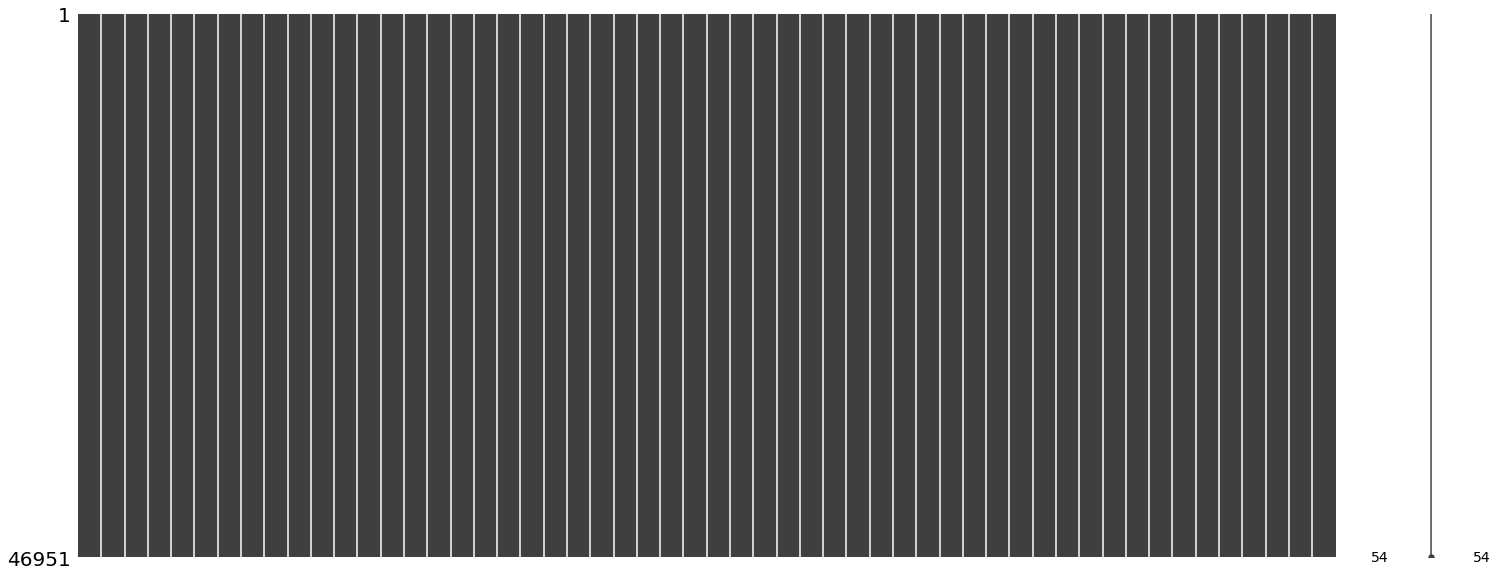

In [41]:
# Visualize missingness for final inspection

msno.matrix(df)
plt.show()

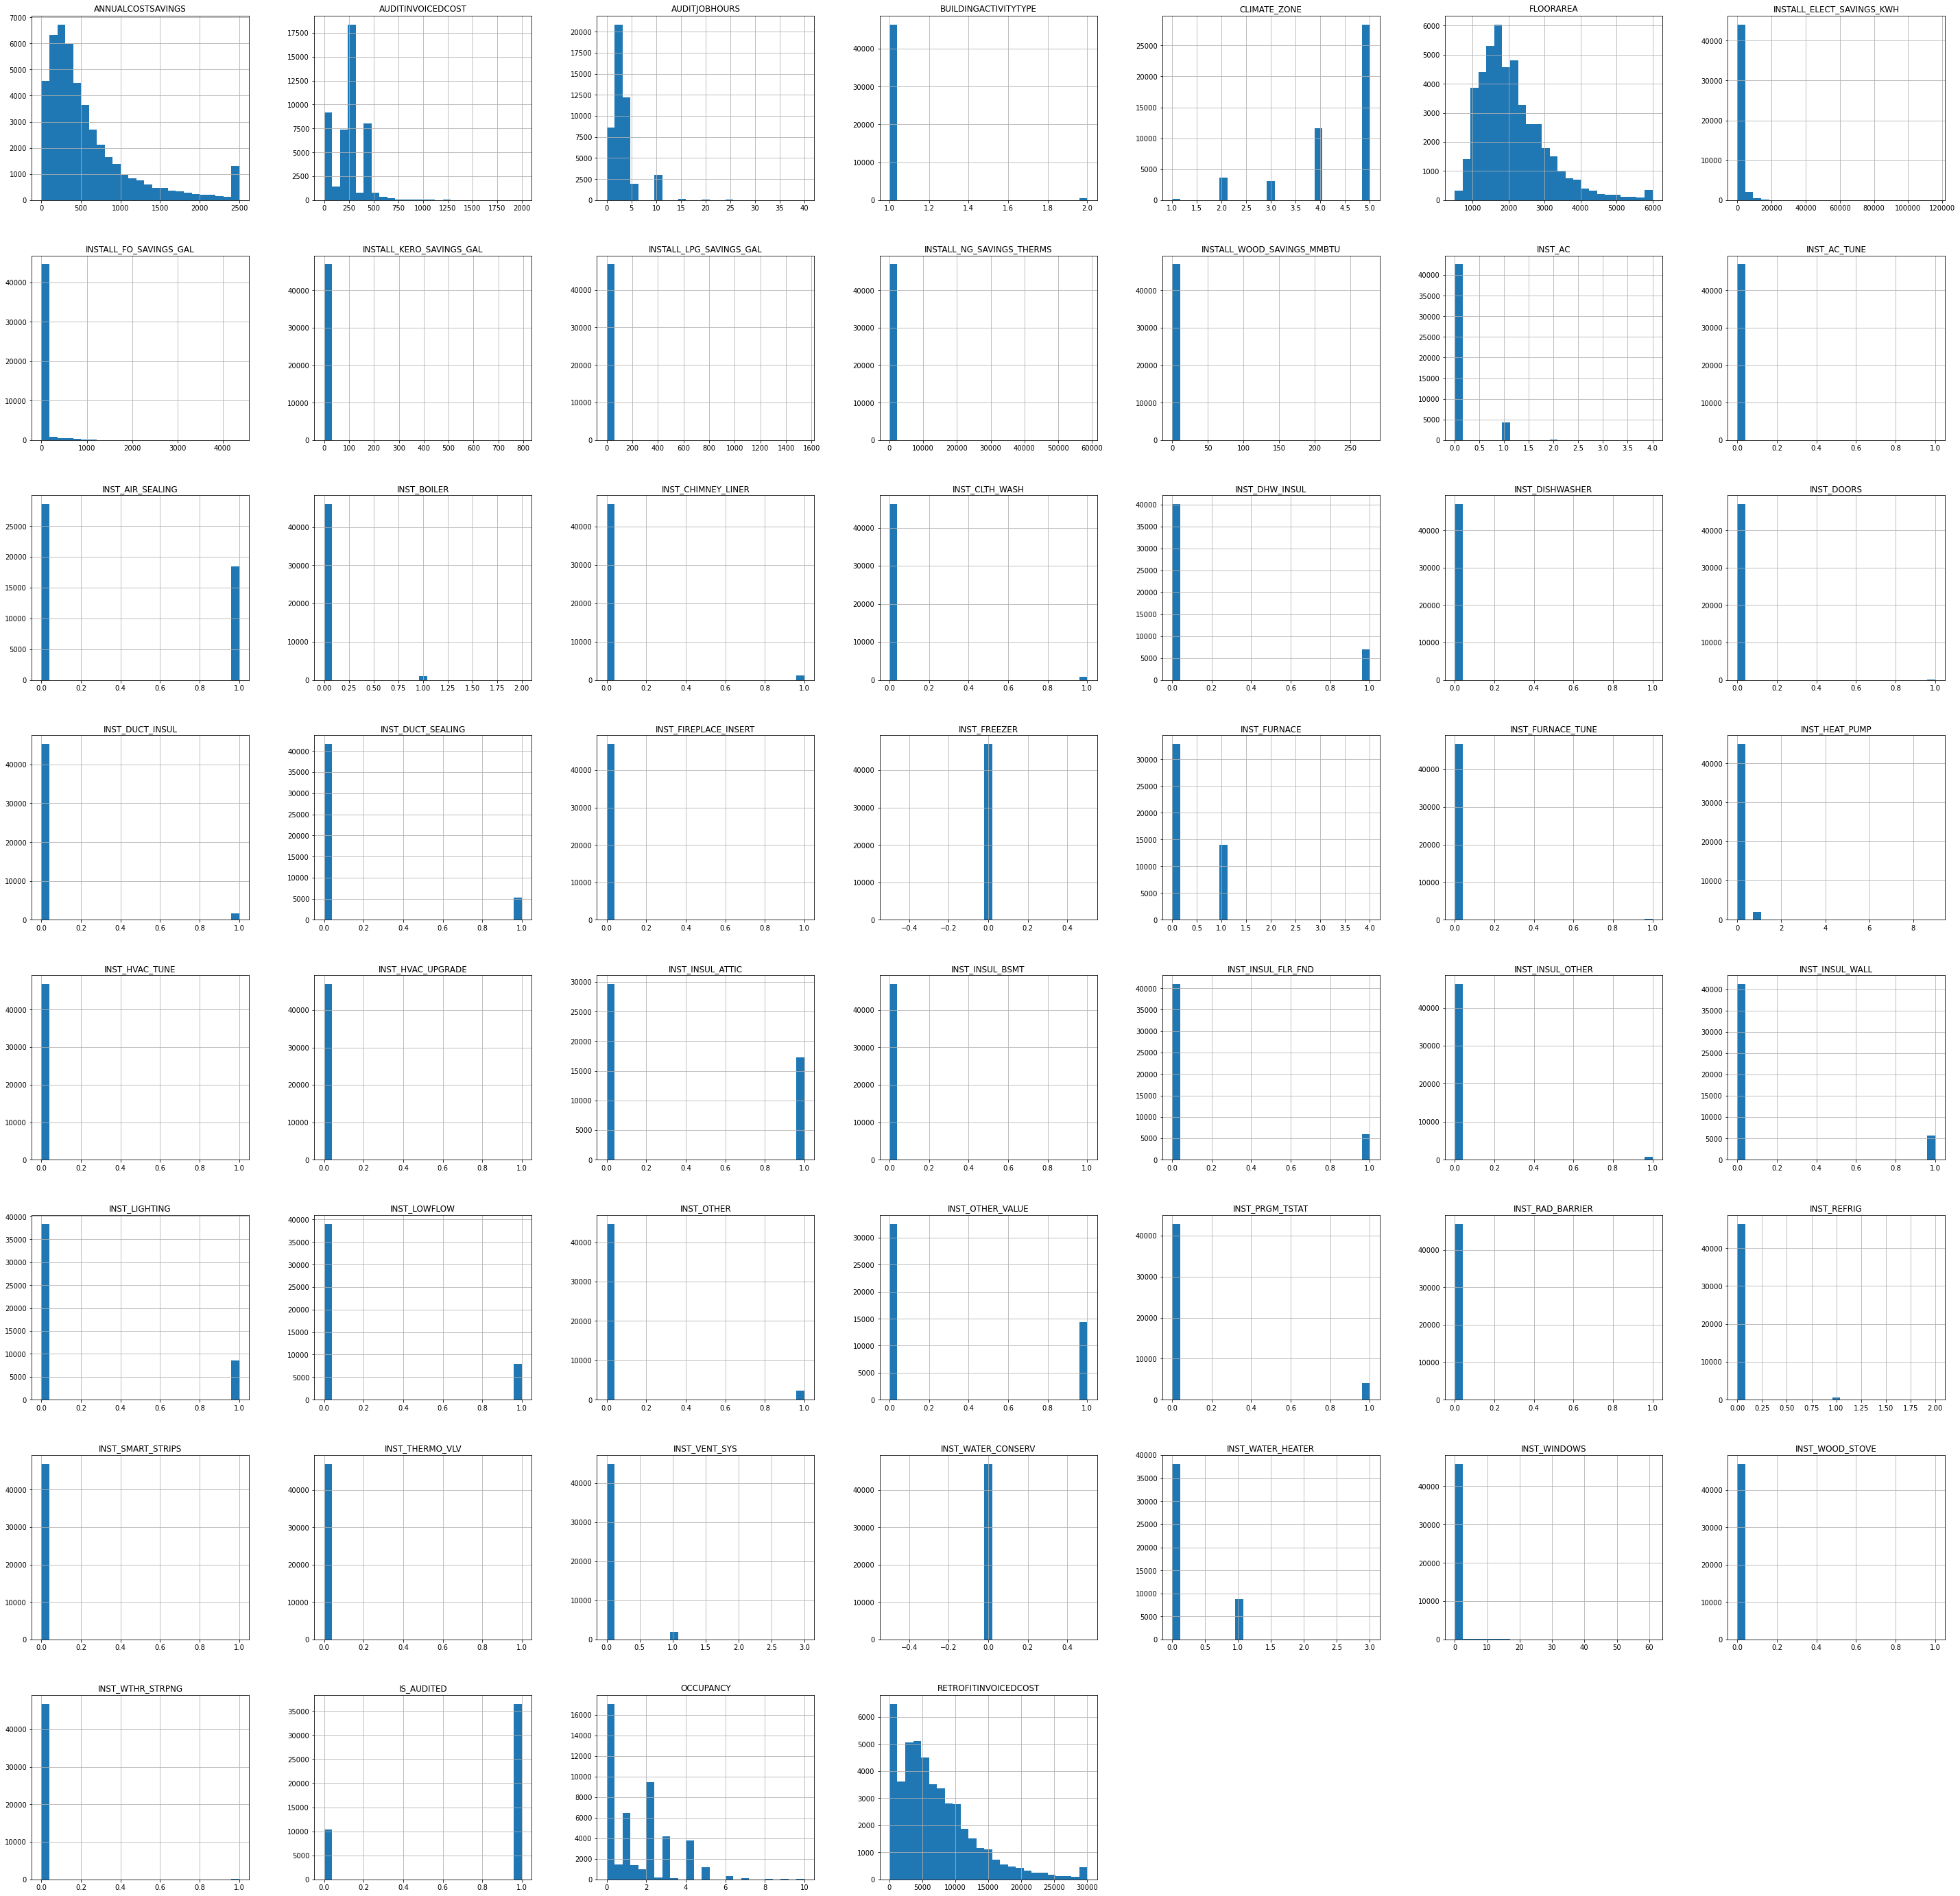

In [42]:
# Plotting numeric variables for further inspection

df.hist(bins=25, figsize=(50, 50))
plt.yscale('log')
plt.show()

It seems that there are some columns with no or very little data. This may make the prediction model more complicated and will not add any value.

In [43]:
# Dropping columns with few data points.

columns2drop = ['INST_WATER_CONSERV',
               'INST_FREEZER', 
               'INST_AC_TUNE', 
               'INST_DISHWASHER', 
               'INST_FIREPLACE_INSERT', 
               'INST_DOORS', 
               'INST_INSUL_BSMT', 
               'INST_HVAC_UPGRADE', 
               'INST_RAD_BARRIER', 
               'INST_THERMO_VLV', 
               'INST_SMART_STRIPS', 
               'INST_WTHR_STRPNG']

df.drop(columns2drop, axis=1, inplace=True)

---
---
**Finally, I will create a new column containing the return of the investment for each retrofit project observed. The values will be calculated from 'RETROFITINVOICEDCOST' and 'ANNUALCOSTSAVINGS' columns by a simple operation**

In [44]:
# Creating a new variable 'RETURN', accounting for investment return of the retrofit project.

df['RETROFITINVOICEDCOST'].replace(0, 1, inplace=True) # Cannot divide by 0
df['RETURN'] = df[['RETROFITINVOICEDCOST', 'ANNUALCOSTSAVINGS']].apply(lambda row: (row['ANNUALCOSTSAVINGS']/row['RETROFITINVOICEDCOST'])*100, axis=1)

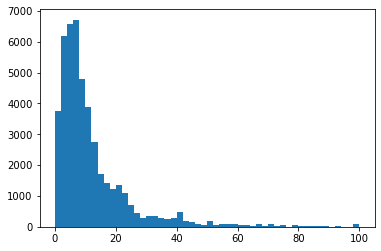

In [45]:
# Plotting the results

plt.hist(df['RETURN'], bins=50, range=(0, 100))

plt.show()

In [46]:
# Removing outliers by eliminating capital returns over 30%.

df['RETURN'] = df['RETURN'].where(df['RETURN']<30, other=30)

In [47]:
# Plotting correlation matrix

corr = df.corr()
 
corr.round(2).style.background_gradient(cmap='coolwarm')

In [48]:
# Saving clean data

file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/processed/clean_data.csv'
df.to_csv(file)